# Accidente cerebrovascular

#### Un accidente cerebrovascular sucede cuando el flujo de sangre a una parte del cerebro se detiene. Algunas veces, se denomina "ataque cerebral".

#### Si el flujo sanguíneo se detiene por más de pocos segundos, el cerebro no puede recibir nutrientes y oxígeno. Las células cerebrales pueden morir, lo que causa daño permanente.

#### Un accidente cerebrovascular se presenta cuando un vaso sanguíneo en el cerebro se rompe, causando un sangrado dentro de la cabeza.

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix


import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')
print("No Warning Shown")

No Warning Shown


# Exploracion de los datos

In [8]:
df=pd.read_csv("stroke_dataset.csv")

In [9]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [10]:
print(df.shape)
print(pd.value_counts(df['stroke'], sort = True))

(4981, 11)
0    4733
1     248
Name: stroke, dtype: int64


In [11]:
pie_df=pd.DataFrame(df.groupby('stroke')['stroke'].count())
pie_df

,stroke
stroke,
0,4733
1,248


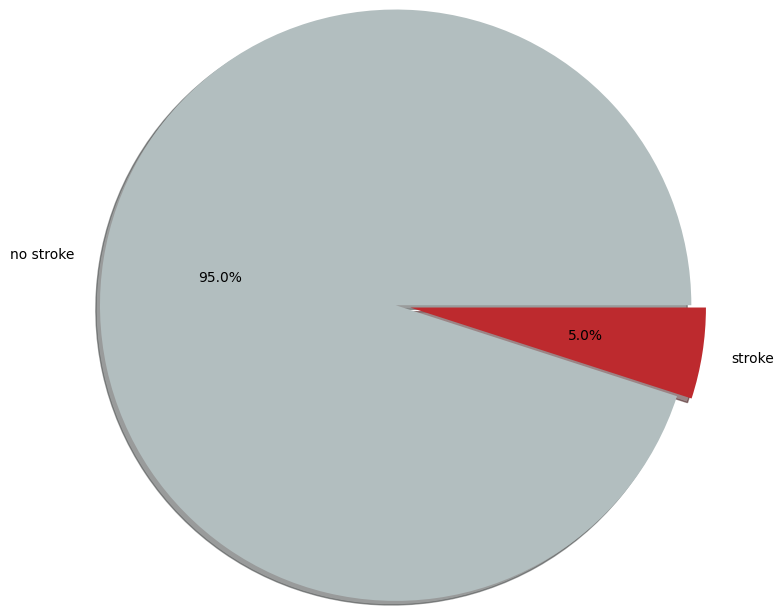

In [12]:
colors = ['#B2BEBF','#BD2A2E']
plt.pie(pie_df['stroke'],labels=['no stroke','stroke'],
        autopct='%.1f%%',colors=colors,radius=2,explode = (0, 0.1),shadow=True)
plt.show()

##### Hay muy pocos casos positivos, por lo cual se ha determinado que el modelo no tendra suficientes datos para entrenar

In [50]:
cols = list(df.columns)
cols_df=cols[1:]

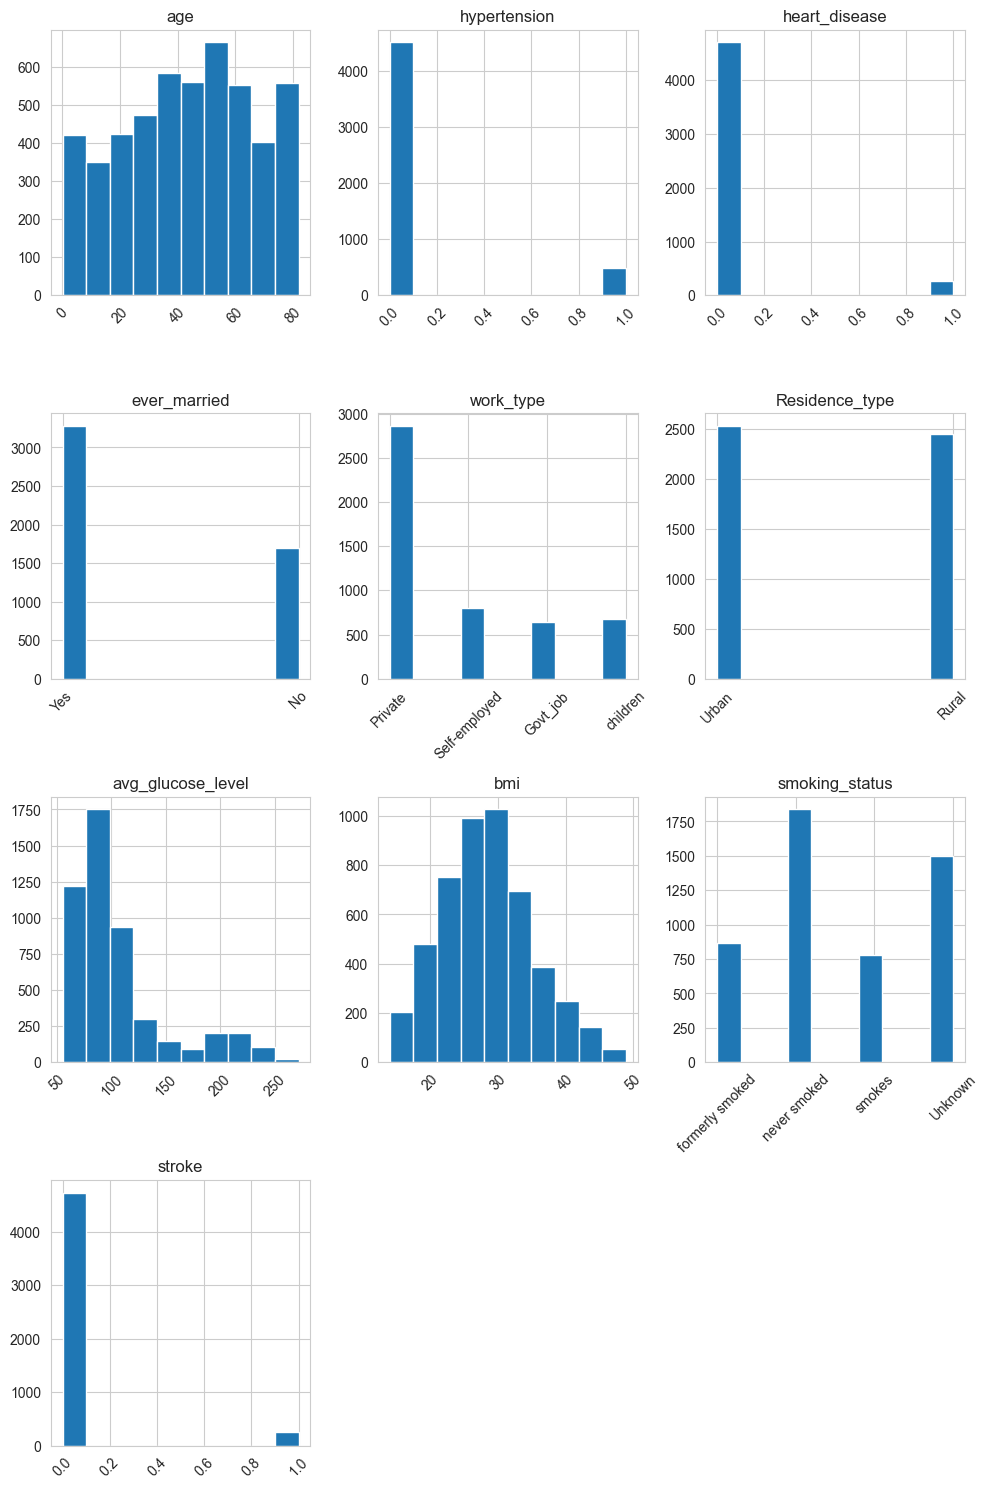

In [51]:
plt.figure(figsize=(10,30))
for i in range(len(cols_df)):
    plt.subplot(8,3,i+1)
    plt.title(cols_df[i])
    plt.xticks(rotation=45)
    plt.hist(df[cols_df[i]])
    
plt.tight_layout()

In [53]:
df.corr()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.278120,0.264852,0.236763,0.373703,0.246478
hypertension,0.278120,1.000000,0.111974,0.170028,0.158762,0.131965
heart_disease,0.264852,0.111974,1.000000,0.166847,0.060926,0.134610
avg_glucose_level,0.236763,0.170028,0.166847,1.000000,0.186348,0.133227
bmi,0.373703,0.158762,0.060926,0.186348,1.000000,0.056926
stroke,0.246478,0.131965,0.134610,0.133227,0.056926,1.000000


##### Observamos que en nuestro dataset tenemos muy pocos casos de personas que han sufrido un stroke

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


##### observamos que tipo de datos hay por cada variable

In [11]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

##### No hay nulos

In [12]:
for i in df.columns:
    print('{} --------------------------> {}'.format(i, df[i].nunique()))


gender --------------------------> 2
age --------------------------> 104
hypertension --------------------------> 2
heart_disease --------------------------> 2
ever_married --------------------------> 2
work_type --------------------------> 4
Residence_type --------------------------> 2
avg_glucose_level --------------------------> 3895
bmi --------------------------> 342
smoking_status --------------------------> 4
stroke --------------------------> 2


In [13]:
df.gender.value_counts()


Female    2907
Male      2074
Name: gender, dtype: int64

In [14]:
df.hypertension.value_counts()


0    4502
1     479
Name: hypertension, dtype: int64

In [15]:
df.heart_disease.value_counts()


0    4706
1     275
Name: heart_disease, dtype: int64

In [16]:
df.ever_married.value_counts()


Yes    3280
No     1701
Name: ever_married, dtype: int64

In [17]:
df.Residence_type.value_counts()


Urban    2532
Rural    2449
Name: Residence_type, dtype: int64

In [18]:
df.stroke.value_counts()


0    4733
1     248
Name: stroke, dtype: int64

In [19]:
df.info

<bound method DataFrame.info of       gender   age  hypertension  heart_disease ever_married      work_type  \
0       Male  67.0             0              1          Yes        Private   
1       Male  80.0             0              1          Yes        Private   
2     Female  49.0             0              0          Yes        Private   
3     Female  79.0             1              0          Yes  Self-employed   
4       Male  81.0             0              0          Yes        Private   
...      ...   ...           ...            ...          ...            ...   
4976    Male  41.0             0              0           No        Private   
4977    Male  40.0             0              0          Yes        Private   
4978  Female  45.0             1              0          Yes       Govt_job   
4979    Male  40.0             0              0          Yes        Private   
4980  Female  80.0             1              0          Yes        Private   

     Residence_type

##### observamos mas a detalle los datos de cada variable para darnos una idea de cuales seran categoricas y numericas 

# Limpieza 

In [20]:
df.drop(["Residence_type", "hypertension", "heart_disease"], axis=1, inplace=True)
df

,gender,age,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,Yes,Private,228.69,36.6,formerly smoked,1
1,Male,80.0,Yes,Private,105.92,32.5,never smoked,1
2,Female,49.0,Yes,Private,171.23,34.4,smokes,1
3,Female,79.0,Yes,Self-employed,174.12,24.0,never smoked,1
4,Male,81.0,Yes,Private,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...
4976,Male,41.0,No,Private,70.15,29.8,formerly smoked,0
4977,Male,40.0,Yes,Private,191.15,31.1,smokes,0
4978,Female,45.0,Yes,Govt_job,95.02,31.8,smokes,0
4979,Male,40.0,Yes,Private,83.94,30.0,smokes,0


##### Elimino variables que considero no son importantes

In [30]:
df['age']= df['age'].round()

In [31]:
df[["age"]]= df[["age"]].astype(int)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   int32  
 2   ever_married       4981 non-null   object 
 3   work_type          4981 non-null   object 
 4   avg_glucose_level  4981 non-null   float64
 5   bmi                4981 non-null   float64
 6   smoking_status     4981 non-null   object 
 7   stroke             4981 non-null   int64  
dtypes: float64(2), int32(1), int64(1), object(4)
memory usage: 292.0+ KB


##### La columna age estaba en decimales y aca lo redondeamos y lo pasamos a int

<AxesSubplot:title={'center':'age'}, xlabel='stroke'>

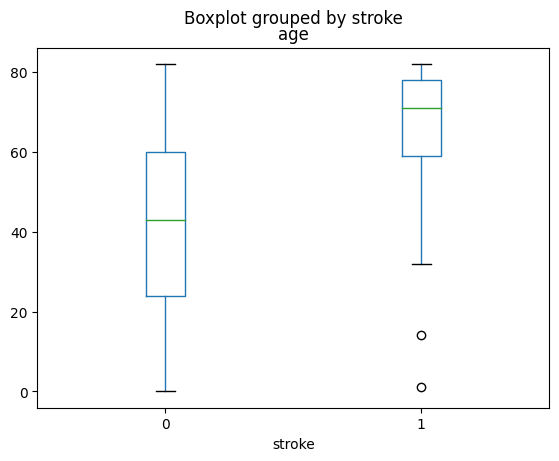

In [23]:
df.boxplot(by ='stroke', column =['age'], grid = False)


##### A partir de los 70 años hay un alto indice de sufrir un stroke (ictus o tambien conocido como derrame cerebral)

In [24]:
df[(df["age"]<15) & (df["stroke"]==1) ]

,gender,age,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke
205,Female,14,No,children,57.93,30.9,Unknown,1
4807,Female,1,No,children,70.37,18.7,Unknown,1


In [25]:
df[(df["age"]<15) & (df["stroke"]==1) ] = df[(df["age"]<15) & (df["stroke"]==1) ].replace('Unknown', 'never smoked')
df

,gender,age,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,Yes,Private,228.69,36.6,formerly smoked,1
1,Male,80,Yes,Private,105.92,32.5,never smoked,1
2,Female,49,Yes,Private,171.23,34.4,smokes,1
3,Female,79,Yes,Self-employed,174.12,24.0,never smoked,1
4,Male,81,Yes,Private,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...
4976,Male,41,No,Private,70.15,29.8,formerly smoked,0
4977,Male,40,Yes,Private,191.15,31.1,smokes,0
4978,Female,45,Yes,Govt_job,95.02,31.8,smokes,0
4979,Male,40,Yes,Private,83.94,30.0,smokes,0


In [26]:
df[(df["age"]<15) & (df["stroke"]==1) ]

,gender,age,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke
205,Female,14,No,children,57.93,30.9,never smoked,1
4807,Female,1,No,children,70.37,18.7,never smoked,1


##### Encontramos que niños menores a 15 años tienen en la variable smoking_status uknown, lo cual hemos debatido con el equipo que un niño a esa edad no fuma, se cambio a status never smoked

In [27]:
df.loc[df['smoking_status'] == 'Unknown']
df

,gender,age,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,Yes,Private,228.69,36.6,formerly smoked,1
1,Male,80,Yes,Private,105.92,32.5,never smoked,1
2,Female,49,Yes,Private,171.23,34.4,smokes,1
3,Female,79,Yes,Self-employed,174.12,24.0,never smoked,1
4,Male,81,Yes,Private,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...
4976,Male,41,No,Private,70.15,29.8,formerly smoked,0
4977,Male,40,Yes,Private,191.15,31.1,smokes,0
4978,Female,45,Yes,Govt_job,95.02,31.8,smokes,0
4979,Male,40,Yes,Private,83.94,30.0,smokes,0


# Variables Categoricas

In [28]:
def bar_plot(variable):
    var = df[variable]
    varValue = var.value_counts()
    
    plt.figure(figsize = (9, 5))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("frequancy")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,varValue))

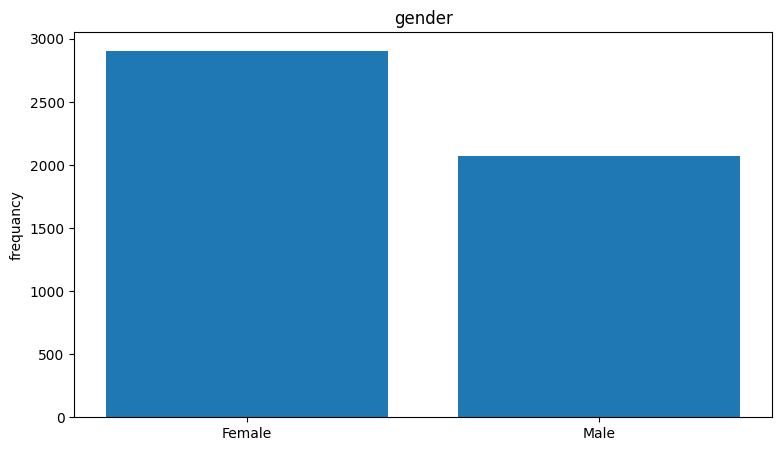

gender: 
 Female    2907
Male      2074
Name: gender, dtype: int64


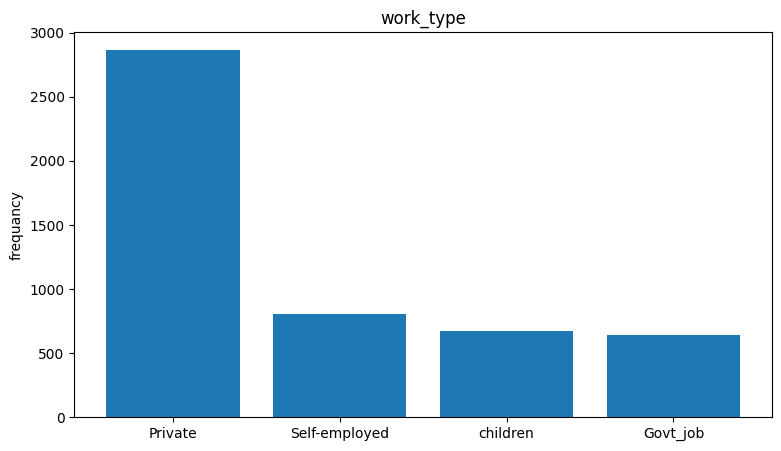

work_type: 
 Private          2860
Self-employed     804
children          673
Govt_job          644
Name: work_type, dtype: int64


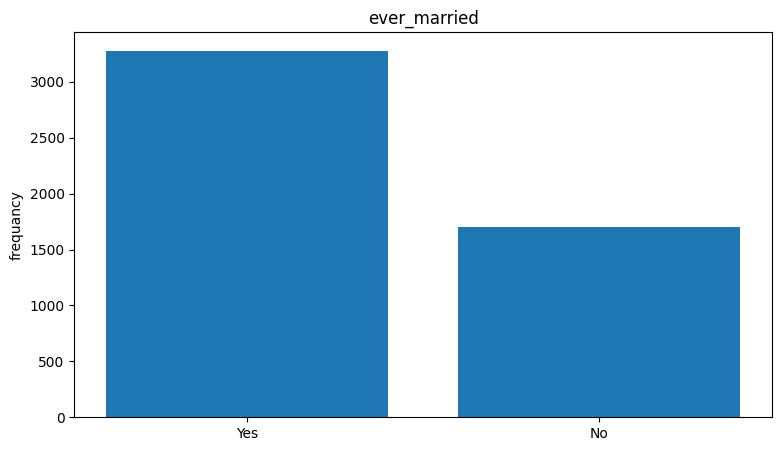

ever_married: 
 Yes    3280
No     1701
Name: ever_married, dtype: int64


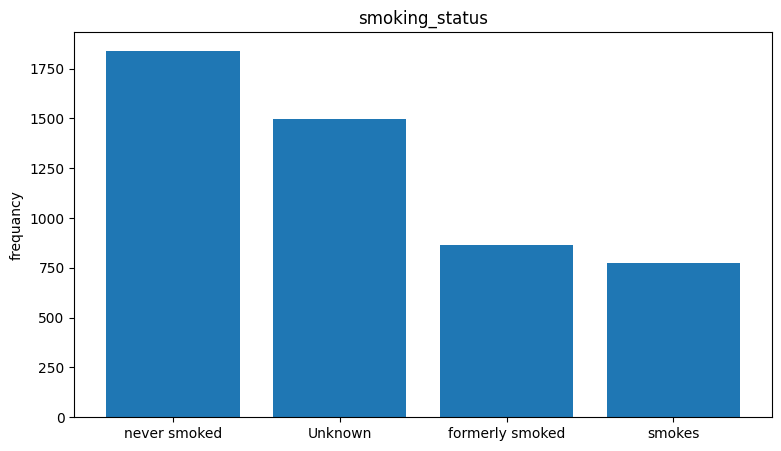

smoking_status: 
 never smoked       1840
Unknown            1498
formerly smoked     867
smokes              776
Name: smoking_status, dtype: int64


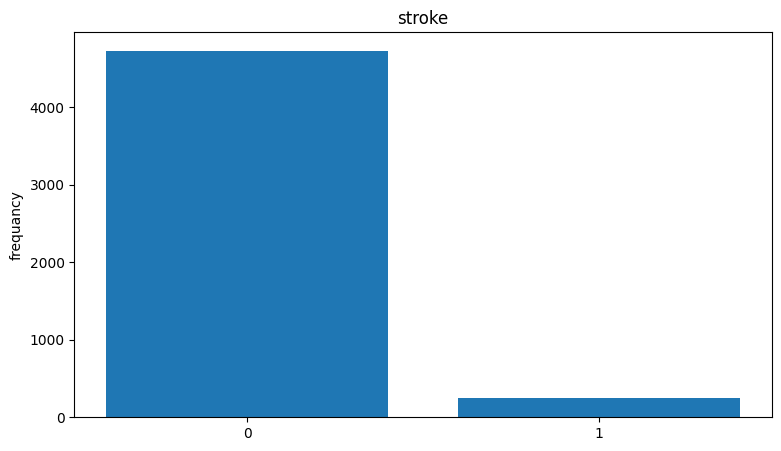

stroke: 
 0    4733
1     248
Name: stroke, dtype: int64


In [32]:
category1 = ["gender","work_type","ever_married","smoking_status","stroke"]
for i in category1:
    bar_plot(i)

# Variables Numericas

In [33]:
def his_plot(variable):
    plt.figure(figsize = (9,5))
    plt.hist(df[variable], bins =70)
    plt.xlabel(variable)
    plt.ylabel("Frequancy")
    plt.title(variable)
    plt.show()

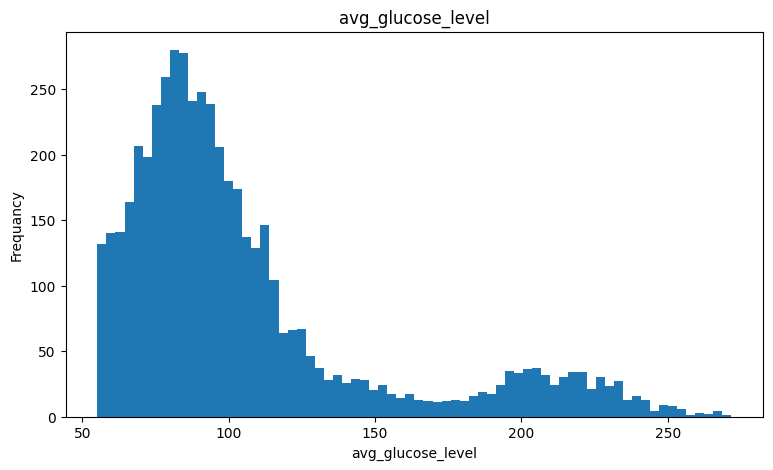

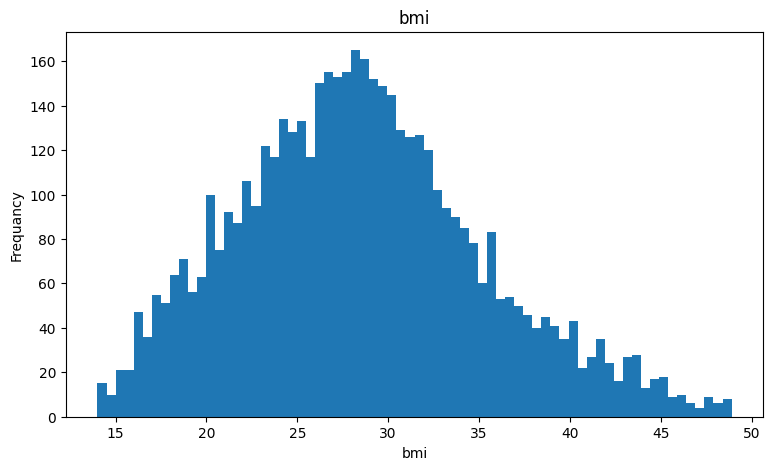

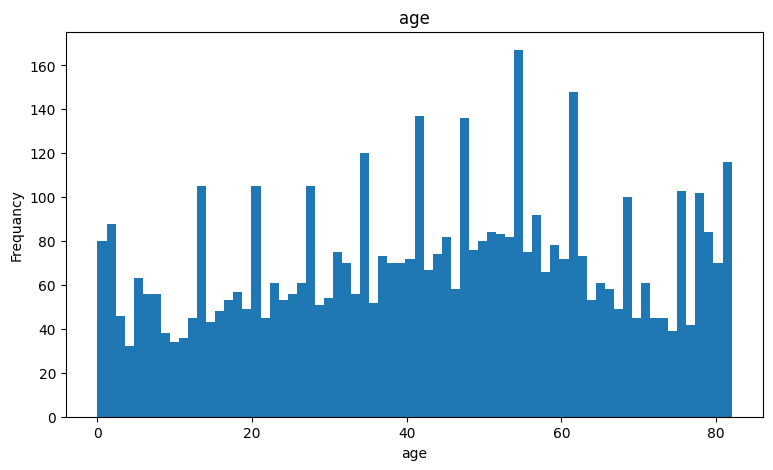

In [34]:
category2 = ["avg_glucose_level","bmi","age"]
for c in category2:
    his_plot(c)

In [56]:
corrDf = df.apply(lambda x:pd.factorize(x)[0])
corrDf.head()


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,1,1,1,1,0
2,1,2,0,1,0,0,0,2,2,2,0
3,1,3,1,1,0,1,1,3,3,1,0
4,0,4,0,1,0,0,0,4,4,0,0


In [57]:
# matriz de correlacion
corr=corrDf.corr()
corr


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
gender,1.000000,-0.015734,-0.021485,0.086476,-0.028971,-0.063684,-0.004301,-0.003350,0.011963,-0.039050,0.008870
age,-0.015734,1.000000,-0.225337,0.207899,0.543319,0.293186,0.024414,0.042538,0.150663,0.286941,0.212586
hypertension,-0.021485,-0.225337,1.000000,-0.111974,-0.164534,-0.073155,0.004755,-0.026456,-0.019053,-0.127008,-0.131965
heart_disease,0.086476,0.207899,-0.111974,1.000000,0.114765,0.056632,0.002125,0.019200,0.070082,0.064861,0.134610
ever_married,-0.028971,0.543319,-0.164534,0.114765,1.000000,0.365538,0.008191,0.016706,0.120293,0.306390,0.108398
work_type,-0.063684,0.293186,-0.073155,0.056632,0.365538,1.000000,-0.008475,0.017066,0.196876,0.312169,0.056713
Residence_type,-0.004301,0.024414,0.004755,0.002125,0.008191,-0.008475,1.000000,0.001438,-0.036646,-0.003405,0.016494
avg_glucose_level,-0.003350,0.042538,-0.026456,0.019200,0.016706,0.017066,0.001438,1.000000,0.077228,0.013468,0.257535
bmi,0.011963,0.150663,-0.019053,0.070082,0.120293,0.196876,-0.036646,0.077228,1.000000,0.105080,0.170281
smoking_status,-0.039050,0.286941,-0.127008,0.064861,0.306390,0.312169,-0.003405,0.013468,0.105080,1.000000,0.066612


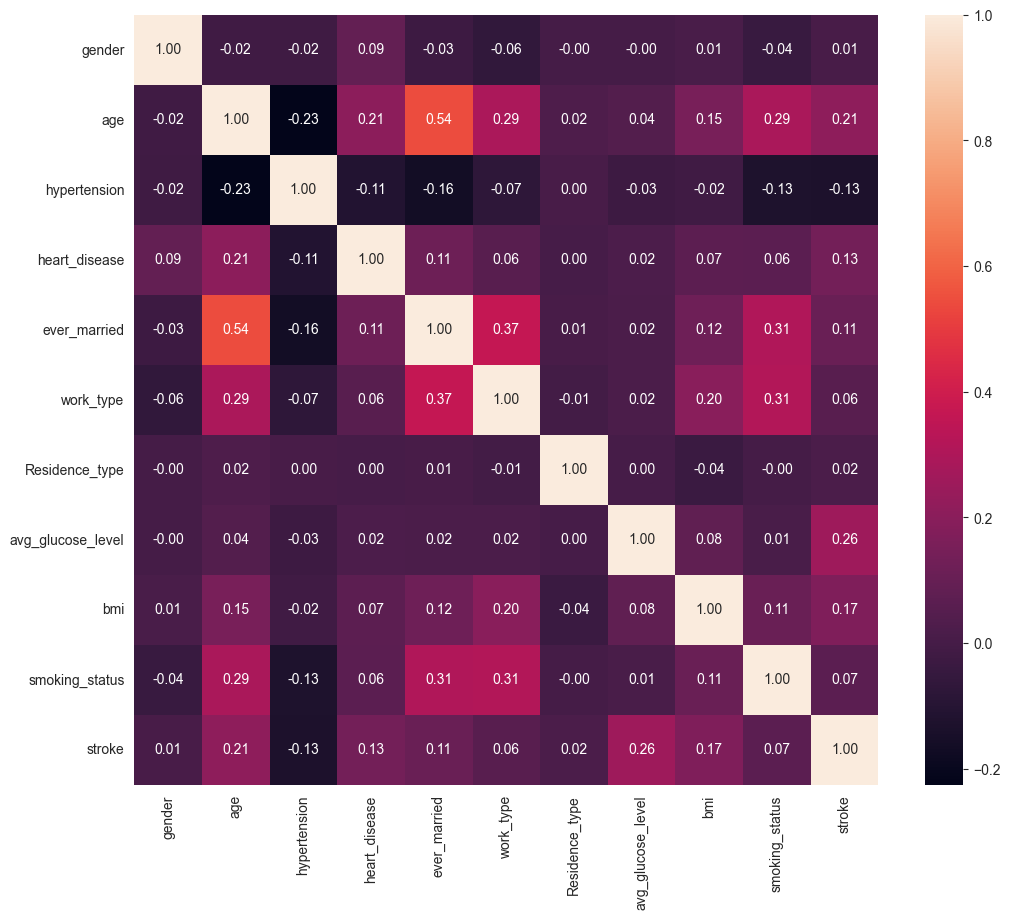

In [58]:
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, fmt= ".2f")
plt.show()

In [60]:
def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy.
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)

tidy_corr_matrix(corr).head (20)


,variable_1,variable_2,r,abs_r
15,age,ever_married,0.543319,0.543319
45,ever_married,age,0.543319,0.543319
49,ever_married,work_type,0.365538,0.365538
59,work_type,ever_married,0.365538,0.365538
64,work_type,smoking_status,0.312169,0.312169
104,smoking_status,work_type,0.312169,0.312169
103,smoking_status,ever_married,0.306390,0.306390
53,ever_married,smoking_status,0.306390,0.306390
56,work_type,age,0.293186,0.293186
16,age,work_type,0.293186,0.293186


##### Aca vemos que la edad influye en si puede o no sufrir un ictus

In [13]:
numericas = ["age", "avg_glucose_level" , "bmi"]
numericas

['age', 'avg_glucose_level', 'bmi']

In [14]:
categoricas= ["work_type" , "smoking_status" , "gender", "ever_married"]
categoricas


['work_type', 'smoking_status', 'gender', 'ever_married']

In [ ]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder , LabelEncoder
from sklearn.compose import ColumnTransformer

#Configuro los transformer
transformer_numerico = ("transformer_numerico",MinMaxScaler(), numericas) 
transformer_categorico = ("transformer_categorico",OneHotEncoder(), categoricas)
#Defino el transformer
transformer = ColumnTransformer ([transformer_numerico, transformer_categorico ], remainder="passthrough")

In [ ]:
X_ub = transformer.fit_transform(X)
var_desbalanceadas= pd.DataFrame(X_ub, columns= transformer.get_feature_names_out()).corr()

NameError: name 'X' is not defined

NameError: name 'var_desbalanceadas' is not defined

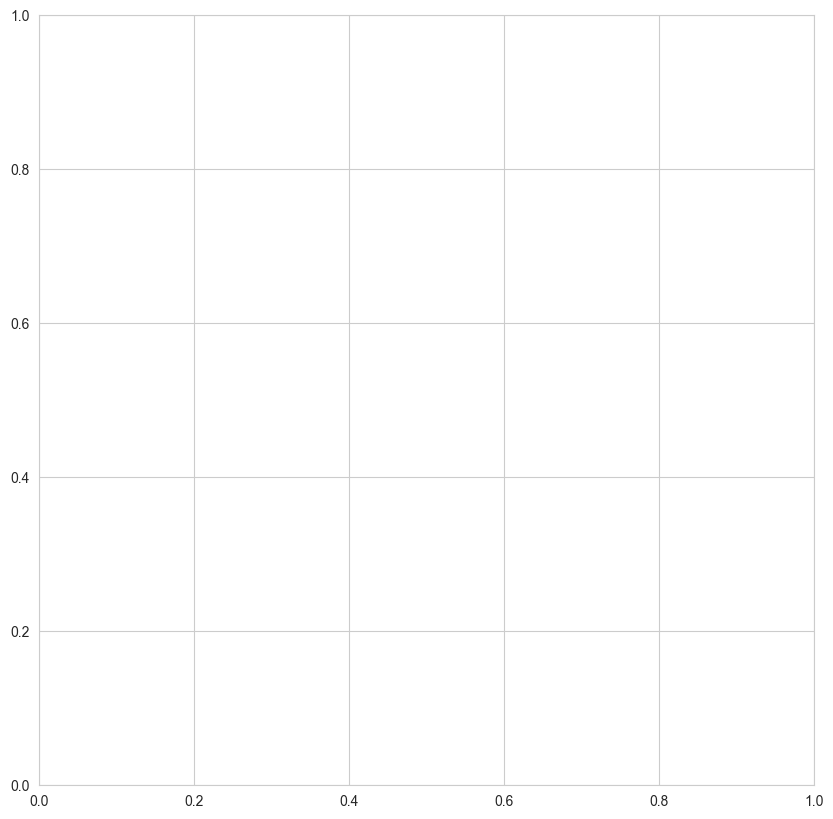

In [67]:
# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

sns.heatmap(
    var_desbalanceadas,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

# HIPOTESIS O CONCLUSIONES

#### 1. Las mujeres son mas propensas a sufrir un ictus a una temprana edad, despues de los 30

#### 2. Hay mas personas que han sufrido un ictus y no sufren de hipertension

#### 3. tenemos mas casos positivos de stroke con personas que no sufren de enfermedades del corazon

#### 4. Las personas casadas son mas propensas a sufrir un ictus

#### 5. Las personas que trabajan en el sector privado son las que han sufrido un ictus

#### 6. si viven en el area rural o urbana no influye mucho (los datos son parejos)

#### 7. tanto para hombres como mujeres han sufrido de un infarto teniendo una glucosa normal en la sangre

#### 8. En hombres el haber fumado antes se ve un alto indice de sufrir un ictus, pero en cambio en las mujeres afecta mas a las que no son fumadoras (por lo que me lleva a pensar que es causado debido a que respirar el humo de cigarrillo de su pareja, ya que aunque ahora esta aumentando el indice de fumadores en mujeres, la mayoria de hombres fuman)




In [54]:
df.corr()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.278120,0.264852,0.236763,0.373703,0.246478
hypertension,0.278120,1.000000,0.111974,0.170028,0.158762,0.131965
heart_disease,0.264852,0.111974,1.000000,0.166847,0.060926,0.134610
avg_glucose_level,0.236763,0.170028,0.166847,1.000000,0.186348,0.133227
bmi,0.373703,0.158762,0.060926,0.186348,1.000000,0.056926
stroke,0.246478,0.131965,0.134610,0.133227,0.056926,1.000000
